## Energy Consumption Prediction Model
### By : Shivam Singh   

In [1]:
# Import Data Manipulation Libraries
import pandas as pd
import numpy as np

# Import data visualization libaries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Neccessory Libraries
# 1 . Importing filter warning libraries
import warnings
warnings.filterwarnings(action= 'ignore')

# 2. Importing Data logging Libraries
import logging
logging.basicConfig(level=logging.INFO,
                    filename= 'model.log',
                    filemode='w',
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    force = True)
#3. Import OrderDict()
from collections import OrderedDict

In [4]:
# Data Ingestion

df = pd.read_csv(r'C:\15Days15Project\Energy-Consumption-Prediction-Model\data\raw\train_energy_data.csv')
df.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17


In [16]:
# Descriptive stats

def descriptive_stats():
    numerical_col = df.select_dtypes(exclude = 'object').columns
    categorica_col = df.select_dtypes(include = 'object').columns
    num_stats = []
    cat_stats = []
    data_info = []

    for i in numerical_col:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1 
        LF = Q1 - 1.5*IQR
        UF = Q3 + 1.5*IQR

        outlier_count = len(df[(df[i] < LF) | (df[i] > UF)])
        outlier_percentage = outlier_count / len(df[i]) * 100

        numerical_stats = OrderedDict({
            "Feature " : i ,
            "Q1" : Q1,
            "Q3" : Q3,
            "IQR" : IQR,
            "LF" : LF,
            "UF" : UF,
            "Mean" : df[i].mean(),
            "Median" : df[i].median(),
            "Min" : df[i].min(),
            "Max" : df[i].max(),
            "Outlier count" : outlier_count,
            "outlier percentage" : outlier_percentage,
            "standard derivation": df[i].std(),
            "variance" : df[i].var(),
            "skewness" : df[i].skew(),
            "kurtosis" : df[i].kurtosis()
        })
        num_stats.append(numerical_stats)
    numerical_stats_report = pd.DataFrame(num_stats)

    for i in categorica_col:
        categorical_stats = OrderedDict({
            "Feature" : i , 
            "Unquie count" : df[i].nunique(),
            "Value count" : df[i].value_counts(),
            "mode" : df[i].mode()
        })
        cat_stats.append(categorical_stats)
    categorical_stats_report = pd.DataFrame(cat_stats)


    for i in df.columns : 
        data1 = OrderedDict({
            "Feature" : i ,
            "Missing value" : df[i].isnull().sum(),
            "Unqiue value" : df[i].nunique(),
            "value count " : df[i].value_counts().to_dict()
        })
        data_info.append(data1)
    data_info_report = pd.DataFrame(data_info)

    return categorical_stats_report,numerical_stats_report,data_info_report

categorical_stats_report,numerical_stats_report,data_info_report = descriptive_stats()

In [18]:
numerical_stats_report

,Feature,Q1,Q3,IQR,LF,UF,Mean,Median,Min,Max,Outlier count,outlier percentage,standard derivation,variance,skewness,kurtosis
0,Square Footage,13169.7500,37446.25,24276.5000,-23245.00000,73861.00000,25462.38800,25477.000,560.00,49997.00,0,0.0,14294.554000,2.043343e+08,0.009313,-1.175406
1,Number of Occupants,22.0000,73.25,51.2500,-54.87500,150.12500,48.37200,47.000,1.00,99.00,0,0.0,29.061972,8.445982e+02,0.089302,-1.241970
2,Appliances Used,13.0000,38.00,25.0000,-24.50000,75.50000,25.60600,26.000,1.00,49.00,0,0.0,14.105166,1.989557e+02,-0.037392,-1.196605
3,Average Temperature,16.4750,28.85,12.3750,-2.08750,47.41250,22.61139,22.815,10.05,34.99,0,0.0,7.139943,5.097878e+01,-0.040406,-1.180404
4,Energy Consumption,3509.4825,4863.85,1354.3675,1477.93125,6895.40125,4166.25257,4175.730,1683.95,6530.60,0,0.0,933.313064,8.710733e+05,-0.046241,-0.575224


In [19]:
categorical_stats_report

,Feature,Unquie count,Value count,mode
0,Building Type,3,Building Type Residential 347 Commercial ...,"0 Residential Name: Building Type, dtype: o..."
1,Day of Week,2,Day of Week Weekday 507 Weekend 493 Name...,"0 Weekday Name: Day of Week, dtype: object"


In [20]:
data_info_report

,Feature,Missing value,Unqiue value,value count
0,Building Type,0,3,"{'Residential': 347, 'Commercial': 336, 'Indus..."
1,Square Footage,0,986,"{39065: 2, 11289: 2, 25057: 2, 20316: 2, 21109..."
2,Number of Occupants,0,99,"{21: 27, 60: 20, 32: 17, 70: 16, 15: 16, 85: 1..."
3,Appliances Used,0,49,"{45: 31, 41: 30, 47: 27, 8: 27, 34: 26, 13: 26..."
4,Average Temperature,0,833,"{16.24: 4, 15.09: 3, 29.74: 3, 17.8: 3, 15.79:..."
5,Day of Week,0,2,"{'Weekday': 507, 'Weekend': 493}"
6,Energy Consumption,0,1000,"{2713.95: 1, 5744.99: 1, 4101.24: 1, 3009.14: ..."


<Axes: >

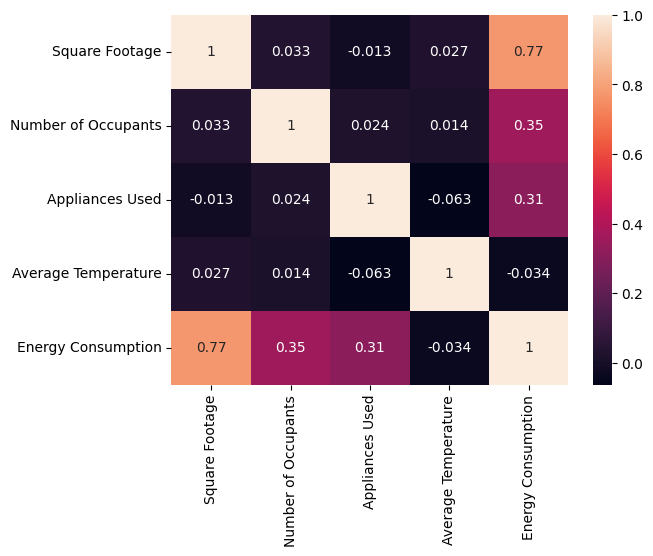

In [22]:
sns.heatmap(df.corr(numeric_only= True) ,annot= True)

<Axes: xlabel='Energy Consumption', ylabel='Number of Occupants'>

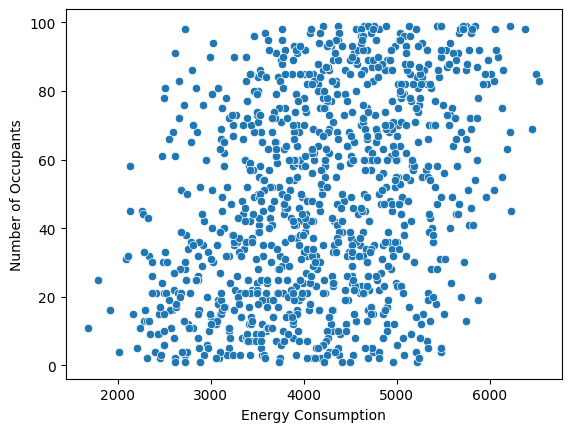

In [43]:
sns.scatterplot(data= df, x='Energy Consumption' , y ='Number of Occupants')

<Axes: xlabel='Energy Consumption', ylabel='Count'>

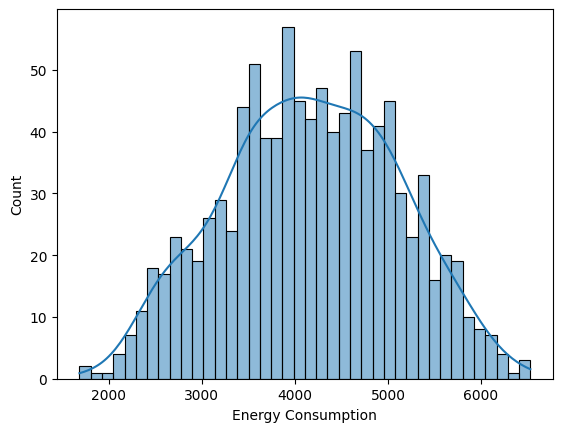

In [ ]:
sns.histplot(data = df['Energy Consumption'], kde= True, bins= 40,)

<Axes: xlabel='Building Type', ylabel='Energy Consumption'>

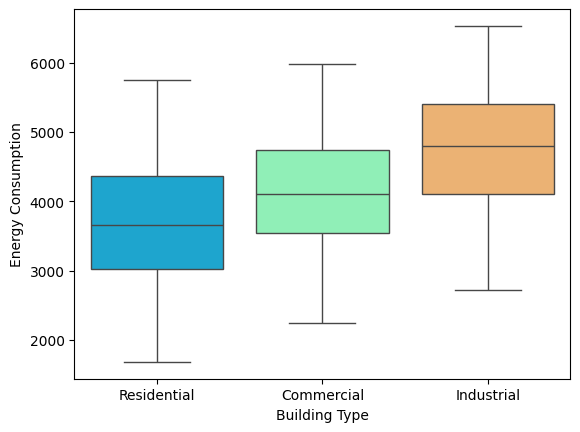

In [55]:
sns.boxplot(x="Building Type", y="Energy Consumption", data=df,palette= 'rainbow')


In [48]:
df.columns

Index(['Building Type', 'Square Footage', 'Number of Occupants',
       'Appliances Used', 'Average Temperature', 'Day of Week',
       'Energy Consumption'],
      dtype='object')

<Axes: xlabel='Day of Week', ylabel='Energy Consumption'>

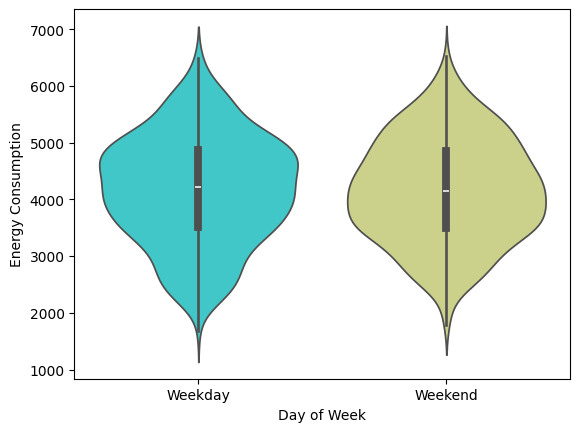

In [57]:
sns.violinplot(x="Day of Week", y="Energy Consumption", data=df, palette= 'rainbow')


<Axes: xlabel='Building Type', ylabel='count'>

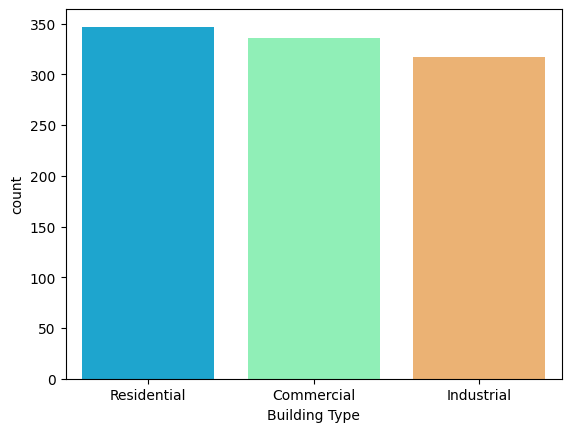

In [59]:
sns.countplot(x="Building Type", data=df,palette='rainbow' )



#### Data Insights:
1. The given dataset is slightly non normal distributed
2. There are no outlier present.
3. Energy consumption is a target column
